In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style
import warnings

In [2]:
df = pd.read_csv("AirBNB.csv")

C:\Users\Classroom_603\AppData\Local\Temp\ipykernel_12636\1651561404.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AirBNB.csv")


In [5]:
df.tail(10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74101,18077717,Private room,1.0,1.0,moderate,True,f,90.0,1.0,1.0,4.584967
74102,7935934,Shared room,10.0,3.0,flexible,False,f,80.0,1.0,10.0,4.110874
74103,11829011,Entire home/apt,2.0,1.0,moderate,True,f,98.0,1.0,1.0,5.135798
74104,14934112,Entire home/apt,2.0,1.0,strict,True,f,100.0,1.0,1.0,4.356709
74105,808802,Private room,2.0,1.0,moderate,True,f,91.0,1.0,1.0,4.248495
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000
74110,3534845,Entire home/apt,4.0,1.0,moderate,False,f,96.0,1.0,2.0,4.852030


In [6]:
df=df.drop('id',axis=1)

In [7]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.155125,2.153603,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.235272,0.582054,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.067365,7.836556,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.265797,0.852149,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.710868,1.254142,0.0,1.0,1.0,2.0,18.0
log_price,74111.0,NaN,NaN,NaN,4.782069,0.717394,0.0,4.317488,4.70953,5.220356,7.600402


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [15]:
for columns in df.columns:
    if df[columns].dtype == 'object':
        print(columns.title()+':',df[columns].nunique())
        print(df[columns].value_counts().sort_values())
        print('\n')

Room_Type: 3
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: room_type, dtype: int64


Cancellation_Policy: 3
moderate    19060
flexible    22543
strict      32500
Name: cancellation_policy, dtype: int64


Cleaning_Fee: 2
False    19708
True     54399
Name: cleaning_fee, dtype: int64


Instant_Bookable: 2
t    19451
f    54660
Name: instant_bookable, dtype: int64




In [19]:
df.instant_bookable.replace(['t','f'],[True,False],inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [20]:
for columns in df.columns:
    if df[columns].dtype == 'object':
        print(columns.title()+':',df[columns].nunique())
        print(df[columns].value_counts().sort_values())
        print('\n')

Room_Type: 3
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: room_type, dtype: int64


Cancellation_Policy: 3
moderate    19060
flexible    22543
strict      32500
Name: cancellation_policy, dtype: int64


Cleaning_Fee: 2
False    19708
True     54399
Name: cleaning_fee, dtype: int64




In [25]:
df = pd.get_dummies(df,columns=['instant_bookable'],drop_first=True)

In [26]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,cleaning_fee_True,cancellation_policy_moderate,cancellation_policy_strict,room_type_Private room,room_type_Shared room,instant_bookable_True
0,3.0,1.0,100.0,1.0,1.0,5.010635,1,0,1,0,0,0
1,7.0,1.0,93.0,3.0,3.0,5.129899,1,0,1,0,0,1
2,5.0,1.0,92.0,1.0,3.0,4.976734,1,1,0,0,0,1
3,4.0,1.0,NaN,2.0,2.0,6.620073,1,0,0,0,0,0
4,2.0,1.0,40.0,0.0,1.0,4.744932,1,1,0,0,0,1


In [28]:
df.isnull().sum()

accommodates                        3
bathrooms                         203
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
cleaning_fee_True                   0
cancellation_policy_moderate        0
cancellation_policy_strict          0
room_type_Private room              0
room_type_Shared room               0
instant_bookable_True               0
dtype: int64

In [29]:
for columns in df.columns:
    if df[columns].dtype =='object':
        mode=df[columns].mode()[0]
        df[columns] = df[columns].fillna(mode)
        df.isnull().sum()

In [30]:
df.isnull().sum()

accommodates                        3
bathrooms                         203
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
cleaning_fee_True                   0
cancellation_policy_moderate        0
cancellation_policy_strict          0
room_type_Private room              0
room_type_Shared room               0
instant_bookable_True               0
dtype: int64

In [31]:
for columns in df.columns:
    if df[columns].dtype !='object':
        mean=df[columns].mean()
        df[columns] = df[columns].fillna(mean)
        df.isnull().sum()

In [32]:
df.isnull().sum()

accommodates                    0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
cleaning_fee_True               0
cancellation_policy_moderate    0
cancellation_policy_strict      0
room_type_Private room          0
room_type_Shared room           0
instant_bookable_True           0
dtype: int64

In [35]:
#Are there any duplicates?
dups = df.duplicated()
print('Number of duplicate rows = %d'%(dups.sum()))


Number of duplicate rows = 19998


In [36]:
print('Before',df.shape)
df.drop_duplicates(inplace=True)
print('After',df.shape)

Before (74111, 12)
After (54113, 12)


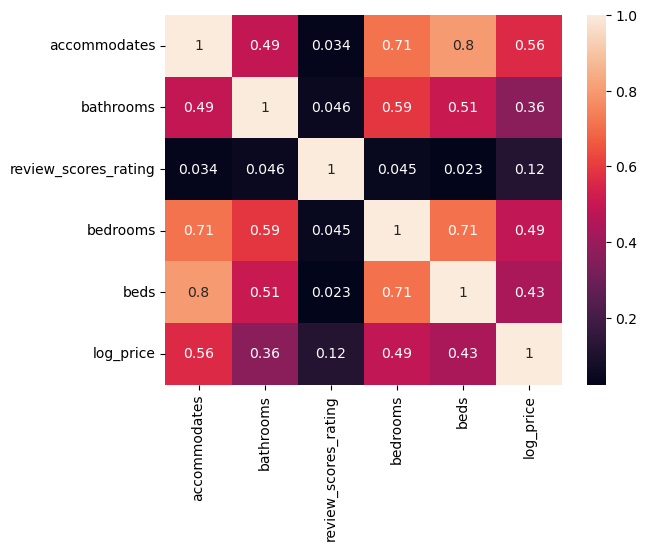

In [37]:
sns.heatmap(df.iloc[:,0:6].corr(),annot=True)
plt.show()

In [ ]:
cont=df.dtypes[(df.dtypes!=)]